In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
from qutip import *

In [60]:
# Parameters

#nph = 0
w0 = 1
w0_res = 1
wf = 0
f1 = 0.6/np.sqrt(2)
f2 = 0.6
T = np.arange(0.01,2,0.05)
Beta = 1/T

In [61]:
# Hamiltonian of the Jaynes-Cummings in the {|e0>,|g1>,|e1>,|g2>,...,|en>,|gn+1>}

def row1(nph):
    return [2*i for i in range(0, nph+1)]
    
def col1(nph):
    return [2*i for i in range(0, nph+1)]

def data1(nph):
    return [0.5*w0+wf*i for i in range(0, nph+1)]

def row2(nph):
    return [2*i+1 for i in range(0, nph+1)]

def col2(nph):
    return [2*i+1 for i in range(0, nph+1)]

def data2(nph):
    return [-0.5*w0+wf*(i+1) for i in range(0, nph+1)]

def row3(nph):
    return [2*i for i in range(0, nph+1)]

def col3(nph):
    return [2*i+1 for i in range(0, nph+1)]

def data3(g, nph):
    return [g*np.sqrt(i+1) for i in range(0, nph+1)]

def row4(nph):
    return [2*i+1 for i in range(0, nph+1)]

def col4(nph):
    return [2*i for i in range(0, nph+1)]

def data4(g, nph):
    return [g*np.sqrt(i+1) for i in range(0, nph+1)]

def hjcp(g, nph):
    return Qobj(csr_matrix((data1(nph), (row1(nph), col1(nph))), shape=(2*(nph+1), 2*(nph+1))).toarray() + csr_matrix((data2(nph), (row2(nph), col2(nph))), shape=(2*(nph+1), 2*(nph+1))).toarray()+csr_matrix((data3(g, nph), (row3(nph), col3(nph))), shape=(2*(nph+1), 2*(nph+1))).toarray()+csr_matrix((data4(g, nph), (row4(nph), col4(nph))), shape=(2*(nph+1), 2*(nph+1))).toarray())

In [62]:
# Operators 

def row5(nph):
    return [2*i+1 for i in range(0, nph+1)]

def col5(nph):
    return [2*i+1 for i in range(0, nph+1)]

def data5(nph):
    return [1 for i in range(0, nph+1)]

def gg(nph):
    "ground state for n photons"
    return Qobj(csr_matrix((data5(nph), (row5(nph), col5(nph))), shape=(2*(nph+1), 2*(nph+1))).toarray())

def row6(nph):
    return [2*i for i in range(0, nph+1)]

def col6(nph):
    return [2*i for i in range(0, nph+1)]

def ee(nph):
    "excited state for n photons"
    return Qobj(csr_matrix((data5(nph), (row6(nph), col6(nph))), shape=(2*(nph+1), 2*(nph+1))).toarray())

def row7(nph):
    return [2*i+1 for i in range(0, nph+1)]

def col7(nph):
    return [2*i for i in range(0, nph+1)]

def data7(nph):
    return [1 for i in range(0, nph+1)]

def sigma_m(nph):
    "sigma - for n photons"
    return Qobj(csr_matrix((data7(nph), (row7(nph), col7(nph))), shape=(2*(nph+1), 2*(nph+1))).toarray())

def row8(nph):
    return [2*i for i in range(0, nph+1)]

def col8(nph):
    return [2*i+1 for i in range(0, nph+1)]

def data8(nph):
    return [1 for i in range(0, nph+1)]

def sigma_p(nph):
    "sigma + for n photons"
    return Qobj(csr_matrix((data8(nph), (row8(nph), col8(nph))), shape=(2*(nph+1), 2*(nph+1))).toarray())

def sigma_z(nph):
    "sigma z for n photons"
    return ee(nph)-gg(nph)

def sigma_x(nph):
    "sigma x for n photons"
    return sigma_m(nph)+sigma_p(nph)

def sigma_y(nph):
    "sigma y for n photons"
    return -1j*sigma_p(nph)+1j*sigma_m(nph)

def s(nph):
    "Ladder Operator of the Reservoir"
    return Qobj(f1*sigma_z(nph)+f2*sigma_m(nph))

def sd(nph):
    "Ladder Operator of the Reservoir"
    return Qobj(f1*sigma_z(nph)+f2*sigma_p(nph))

def z(beta):
    "Partition Function of the two level atom in thermal equilibrium"
    return np.exp(-0.5*beta*w0_res)+np.exp(0.5*beta*w0_res)

def rho_th(beta):
    "Density Matrix of the two level atom ensemble in thermal equilibrium"
    return Qobj(np.array([[np.exp(-0.5*beta*w0_res)/z(beta),0],[0,np.exp(0.5*beta*w0_res)/z(beta)]]))

def c1(Nmax, beta):
    "Constant relating the bath element (atom)"
    sigma_minus = Qobj(np.array([[0,0],[1,0]]))
    sigma_plus = Qobj(np.array([[0,1],[0,0]]))
    return Nmax*(sigma_minus*sigma_plus*rho_th(beta)).tr()

def c2(Nmax, beta):
    sigma_minus = Qobj(np.array([[0,0],[1,0]]))
    sigma_plus = Qobj(np.array([[0,1],[0,0]]))
    "Constant relating the bath element (atom)"
    return Nmax*(sigma_plus*sigma_minus*rho_th(beta)).tr()

def c_op_list(Nmax, beta, nph): 
    "Set of the dissipator operators"
    return [np.sqrt(c1(Nmax, beta))*s(nph), np.sqrt(c2(Nmax, beta))*sd(nph)]

def rho_ss(Nmax, beta, g, nph):
    "Steady State Density Matrix of the Atom"
    return steadystate(hjcp(g, nph), c_op_list(Nmax, beta, nph))

def coh_ss(Nmax, beta, g, nph):
    "Coherence"
    return np.abs((sigma_x(nph)*rho_ss(Nmax, beta, g, nph)+1j*sigma_y(nph)*rho_ss(Nmax, beta, g, nph)).tr())

def coh_nmax(Nmax,beta, g, nph):
    "Coherence function of N bath elements (Nmax)"
    coh_n = np.array([])
    for i in range(0,len(beta)):
        coh_n = np.append(coh_n, coh_ss(Nmax, beta[i], g, nph))
    return coh_n

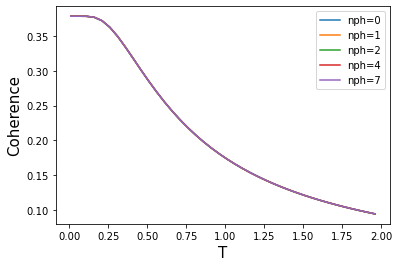

In [63]:
plt.plot(T,coh_nmax(1, Beta, 0.2, 0))
plt.plot(T,coh_nmax(1, Beta, 0.2, 1))
plt.plot(T,coh_nmax(1, Beta, 0.2, 2))
plt.plot(T,coh_nmax(1, Beta, 0.2, 4))
plt.plot(T,coh_nmax(1, Beta, 0.2, 7))
plt.xlabel("T",size=15)
plt.ylabel("Coherence", size=15)
plt.legend(["nph=0", "nph=1", "nph=2", "nph=4", "nph=7"])
plt.show()

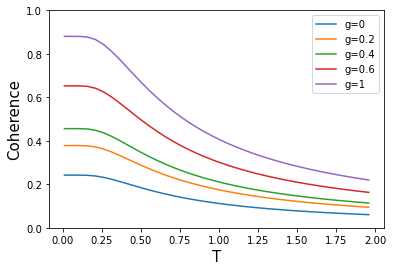

In [64]:
plt.plot(T,coh_nmax(1, Beta, 0.0, 0))
plt.plot(T,coh_nmax(1, Beta, 0.2, 0))
plt.plot(T,coh_nmax(1, Beta, 0.4, 0))
plt.plot(T,coh_nmax(1, Beta, 0.6, 0))
plt.plot(T,coh_nmax(1, Beta, 1.0, 0))
plt.xlabel("T",size=15)
plt.ylabel("Coherence", size=15)
plt.ylim(0,1)
plt.legend(["g=0", "g=0.2", "g=0.4", "g=0.6", "g=1"])
plt.show()

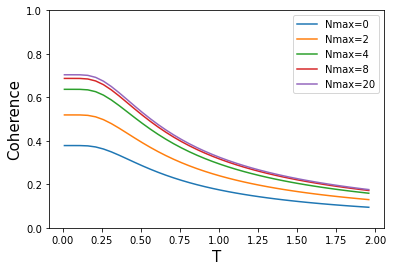

In [57]:
plt.plot(T,coh_nmax(1, Beta, 0.2, 0))
plt.plot(T,coh_nmax(2, Beta, 0.2, 0))
plt.plot(T,coh_nmax(4, Beta, 0.2, 0))
plt.plot(T,coh_nmax(8, Beta, 0.2, 0))
plt.plot(T,coh_nmax(20, Beta, 0.2, 0))
plt.xlabel("T",size=15)
plt.ylabel("Coherence", size=15)
plt.ylim(0,1)
plt.legend(["Nmax=0", "Nmax=2", "Nmax=4", "Nmax=8", "Nmax=20"])
plt.show()

In [58]:
# Increases coherence when g increases and when Nmax increases
# When we leave Nmax and G fixed, and we vary number of photons, we get the same, but we have
# a numerical problem at the beginning of T, from nph = 8